# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | sao jose da coroa grande
Processing Record 4 of Set 1 | ghanzi
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | leua
Processing Record 14 of Set 1 | udaipur
Processing Record 15 of Set 1 | ordos
City not found. Skipping...
Processing Record 16 of Set 1 | haverhill
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,18.51,83,0,2.57,ZA,1734486625
1,hawaiian paradise park,19.5933,-154.9731,27.15,82,75,5.66,US,1734486793
2,sao jose da coroa grande,-8.8978,-35.1478,26.36,81,98,2.94,BR,1734486749
3,ghanzi,-21.5667,21.7833,22.65,69,100,3.89,BW,1734486797
4,qaqortoq,60.7167,-46.0333,-8.86,74,100,3.74,GL,1734486799


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,18.51,83,0,2.57,ZA,1734486625
1,hawaiian paradise park,19.5933,-154.9731,27.15,82,75,5.66,US,1734486793
2,sao jose da coroa grande,-8.8978,-35.1478,26.36,81,98,2.94,BR,1734486749
3,ghanzi,-21.5667,21.7833,22.65,69,100,3.89,BW,1734486797
4,qaqortoq,60.7167,-46.0333,-8.86,74,100,3.74,GL,1734486799


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

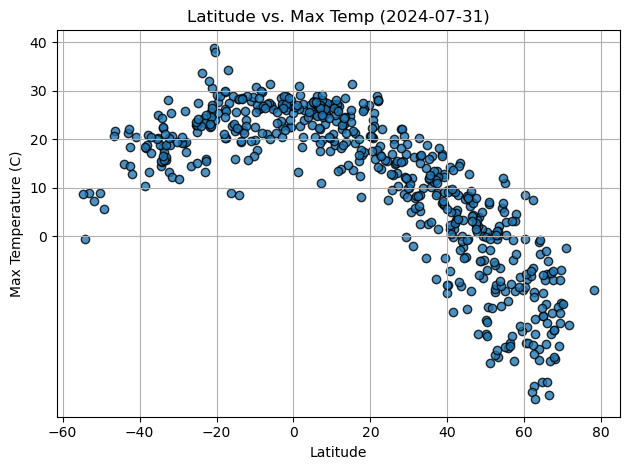

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Max Temp (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Max Temp"])+10, step=10))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

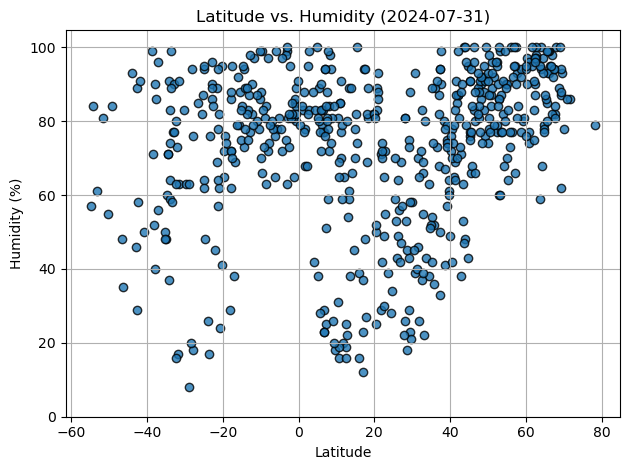

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Humidity (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Humidity"])+10, step=20))

plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

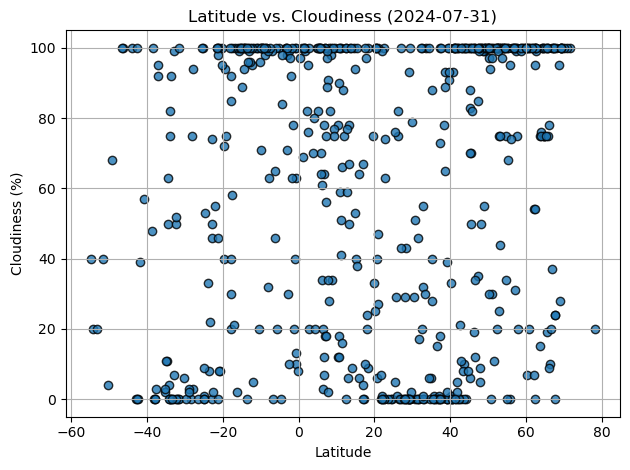

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Cloudiness (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, max(city_data_df["Cloudiness"])+10, step=20))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

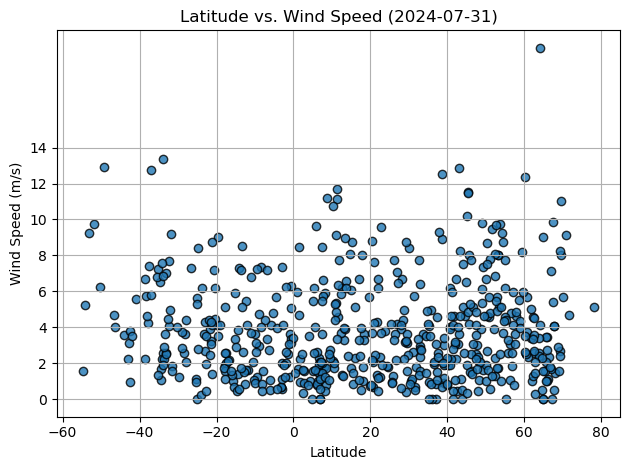

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs. Wind Speed (2024-07-31)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xticks(np.arange(-60, 100, step=20))
plt.yticks(np.arange(0, 16, step=2))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates, ylabel, plot_filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_squared = rvalue**2
    print(f"The r^2 value is: {r_squared}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    # plt.grid(True)
    plt.savefig(plot_filename)
    plt.show()
    
    # print(f"The r^2 value is: {r_squared:.f}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,27.15,82,75,5.66,US,1734486793
4,qaqortoq,60.7167,-46.0333,-8.86,74,100,3.74,GL,1734486799
5,hasaki,35.7333,140.8333,10.16,52,1,4.96,JP,1734486800
9,bilibino,68.0546,166.4372,-25.28,100,100,1.48,RU,1734486806
10,saipan,15.1355,145.7010,31.39,82,40,8.75,MP,1734486808


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,18.51,83,0,2.57,ZA,1734486625
2,sao jose da coroa grande,-8.8978,-35.1478,26.36,81,98,2.94,BR,1734486749
3,ghanzi,-21.5667,21.7833,22.65,69,100,3.89,BW,1734486797
6,port-aux-francais,-49.3500,70.2167,5.70,84,68,12.92,TF,1734486802
7,atafu village,-8.5421,-172.5159,26.54,84,100,7.36,TK,1734486803


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7631844911689765


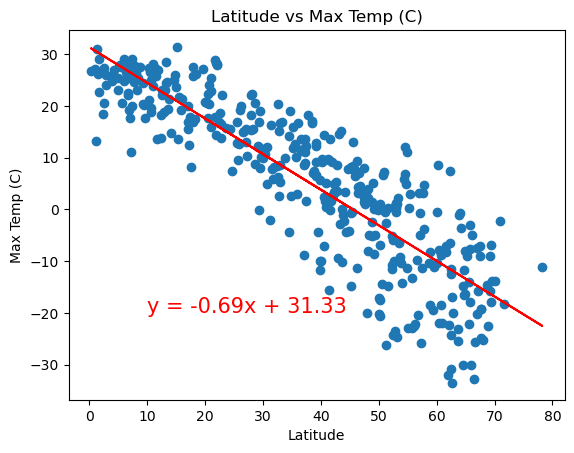

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Latitude vs Max Temp (C)", (10, -20), "Max Temp (C)", "output_data/fig5.png")

The r^2 value is: 0.34565152469415666


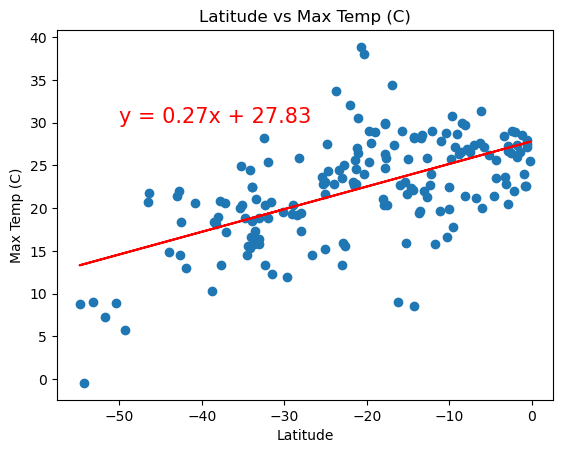

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs Max Temp (C)", (-50, 30), "Max Temp (C)", "output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.1690313977758459


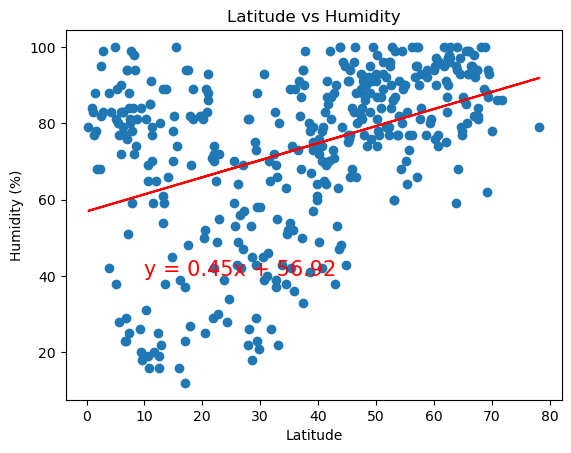

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", (10, 40), "Humidity (%)", "output_data/Fig7.png")


The r^2 value is: 0.11434747824273689


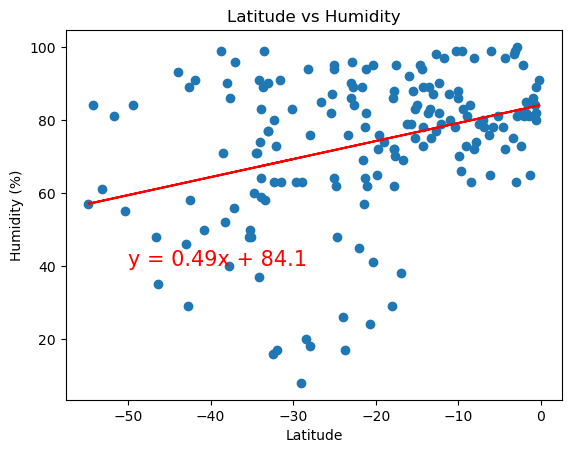

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs Humidity", (-50, 40), "Humidity (%)", "output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.023624888641830852


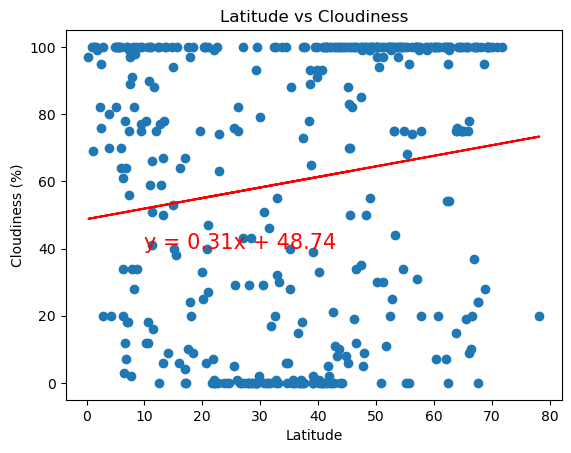

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", (10, 40), "Cloudiness (%)", "output_data/Fig9.png")

The r^2 value is: 0.13386447000178503


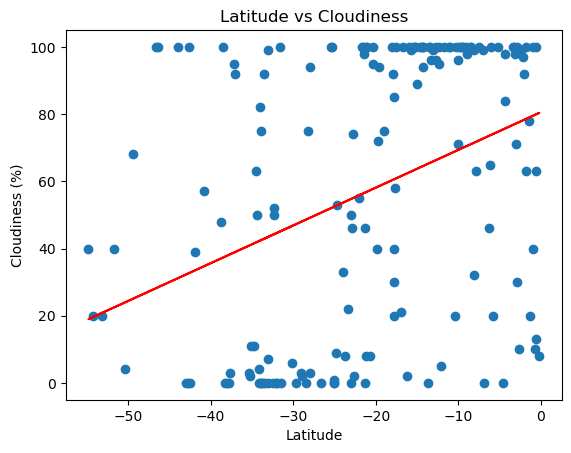

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs Cloudiness", (10, 40), "Cloudiness (%)", "output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.007589449039160768


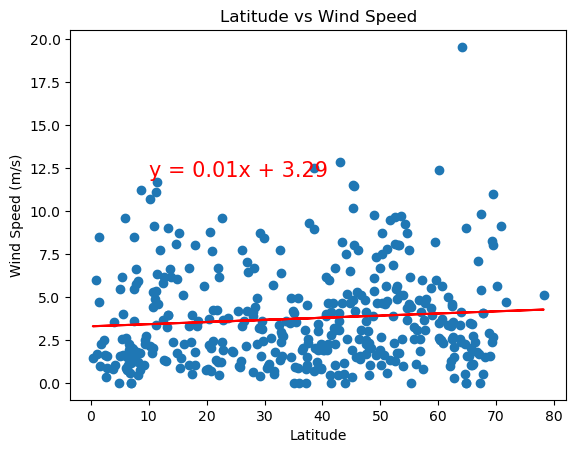

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", (10, 12), "Wind Speed (m/s)", "output_data/Fig11.png")

The r^2 value is: 0.08688124371563549


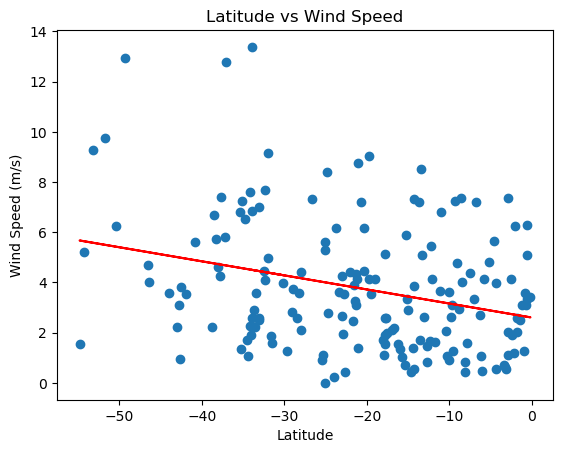

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs Wind Speed", (10, 12), "Wind Speed (m/s)", "output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE